In [ ]:
!pip install pytesseract
!pip install imutils

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=3c1500a67dac4b0cc465b21cc0b7672de99e24c8e8a0bc2bb5df19bcdfceb53f
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd /content/gdrive/My Drive/Licenta/ColabStorage
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls

/content/gdrive/My Drive/Licenta/ColabStorage
backup					    img_4k.png
coco.names				    obj.data
darknet					    obj.names
data					    obj.zip
generate_train.py			    OCR
haarcascade_licence_plate_rus_16stages.xml  unnamed.jpg
haarcascade_russian_plate_number.xml	    yolov3_custom.cfg
img_4k_2.jpg				    yolov3_LPR.cfg
img_4k_3.jpg				    yolov3_LPR.weights


In [ ]:
!cp /mydrive/Licenta/ColabStorage/OCR/coco.names .
!cp /mydrive/Licenta/ColabStorage/OCR/yolov3_LPR.cfg  .
!cp /mydrive/Licenta/ColabStorage/OCR/yolov3_LPR.weights  .

In [ ]:

whT = 320

classesFile = 'coco.names'
classNames = []

#confidence threshhold
confThreshHold = 0.5

# the higher, the agressive and less number of bounding boxes
nmsThreshHold = 0.6

In [ ]:
# read file with classes that yolov3 recognizes
with open(classesFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

# read the conf file and weights of yolov3
modelConfiguration = 'yolov3_LPR.cfg'
modelWeights = 'yolov3_LPR.weights'

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)    

In [ ]:
img = cv2.imread('img_4k_2.jpg')
original_img = img.copy()

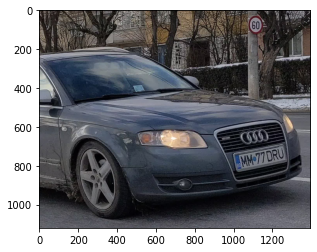

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:

blob = cv2.dnn.blobFromImage(img, 1/255, (whT, whT), [0,0,0], 1, crop = False)
net.setInput(blob)

layerNames = net.getLayerNames()
# print(layerNames)
net.getUnconnectedOutLayers()
outputNames = [layerNames[i[0]-1] for i in net.getUnconnectedOutLayers()]

# get the output of the 3 layers. Outputs is a list

outputs = net.forward(outputNames)

In [ ]:
#find objects in picture
hT, wT, cT = img.shape
# list with x,y,w,h
bbox = []
classIds = []
# confidence values
confs = []
for output in outputs:
    for det in output:
        scores = det[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        if confidence > confThreshHold:
            w, h = int(det[2] * wT), int(det[3] * hT)
            x, y = int(det[0] * wT - w/2), int(det[1] * hT - h/2)
            bbox.append([x,y,w,h])
            classIds.append(classId)
            confs.append(float(confidence))

indices = cv2.dnn.NMSBoxes(bbox, confs, confThreshHold, nmsThreshHold)

x, y, w, h = 0, 0, 0, 0

for i in indices:
    i = i[0]
    box = bbox[i]
    x, y, w, h = box[0], box[1], box[2], box[3]
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, f'{classNames[classIds[i]].upper()} {int(confs[i] * 100)}%' , (x, y-10), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0,255,0), 2)



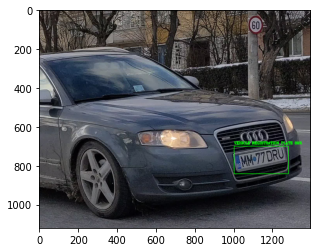

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

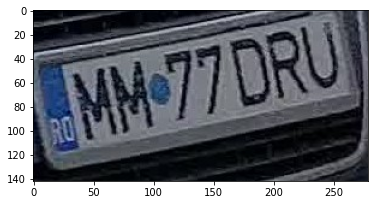

In [ ]:
cropped_image = original_img[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Paste this in console to avoid timeout on colab
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

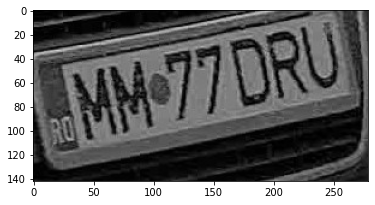

In [ ]:
# convert image to grayscale
grayscale_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(grayscale_img, cv2.COLOR_BGR2RGB))

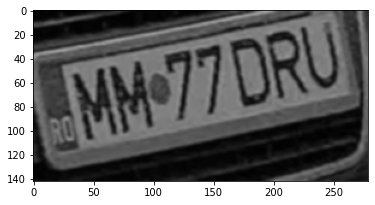

In [ ]:
# gaussian blur for denoising. Makes characters more readable
gaussian_blur_img = cv2.GaussianBlur(grayscale_img, (5, 5), 0) 
plt.imshow(cv2.cvtColor(gaussian_blur_img, cv2.COLOR_BGR2RGB))

In [ ]:
!apt-get update
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr tesseract-ocr-dev
!apt-get install libtesseract-dev
!pip install tesseract
!pip install tesseract-ocr

In [ ]:
!which tesseract
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [ ]:
	def build_tesseract_options(psm=7):
		# tell Tesseract to only OCR alphanumeric characters
		alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
		options = "-c tessedit_char_whitelist={}".format(alphanumeric)
		# set the PSM mode
		options += " --psm {}".format(psm)
		# return the built options string
		return options

In [ ]:
options = build_tesseract_options(psm=7)
lpText = pytesseract.image_to_string(gaussian_blur_img, config=options)
lpText

'yw TOR\n\x0c'

In [ ]:
predicted_result = pytesseract.image_to_string(gaussian_blur_img, lang ='eng', config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789') 
# filtered_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "") 

predicted_result


TesseractError: ignored